In [8]:
from keras.datasets import mnist
from matplotlib import pyplot
# load dataset
(trainX, trainy), (testX, testy) = mnist.load_data()
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.nn.functional as F

X_train_tensor = torch.from_numpy(trainX).float()
y_train_tensor = torch.from_numpy(trainy).long()
X_train_tensor = X_train_tensor.view(60000, 28*28)/225
X_test_tensor = torch.from_numpy(testX).float()
y_test_tensor = torch.from_numpy(testy).long()
X_test_tensor = X_test_tensor.view(10000, 28*28)/225



In [11]:

import torch.nn as nn
import torch.nn.functional as F
import torch

device = torch.device("cuda:0")

H = 64
n, d = X_train_tensor.shape


#part a
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(d, H)
        #self.relu = nn.ReLU()
        self.fc2 = nn.Linear(H, d)

    def forward(self, x):
        #x = self.relu(self.fc1(x))
        #x = self.relu(self.fc2(x))
        x = self.fc1(x)
        x = self.fc2(x)
        return x


model = Net()
model.to(device)


Net(
  (fc1): Linear(in_features=784, out_features=64, bias=True)
  (fc2): Linear(in_features=64, out_features=784, bias=True)
)

In [12]:
import torch.optim as optim
loss_fn = torch.nn.MSELoss(reduction='sum')

learning_rate = 1e-4
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

In [ ]:
# part a and b
X_train_tensor = X_train_tensor.to(device)
y_train_tensor = y_train_tensor.to(device)
for t in range(3000):
    y_pred = model(X_train_tensor)
    loss = loss_fn(y_pred, X_train_tensor)
    if t % 100 == 99:
        print(t, loss.item())
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

# h=32 linear 1445909.0
# h=64 linear 737962.875
# h=128 linear 360214.75

# h=32 relu 1362320.125
# h=64 relu 565809.125
# h=128 relu 307534.03125



99 4568497.0
199 3500835.0
299 3106593.0
399 2734629.5
499 2442103.25
599 2219591.5
699 2045782.125
799 1903491.0
899 1780031.5
999 1668818.125
1099 1567466.25
1199 1475084.875
1299 1390916.875
1399 1314281.0


In [ ]:
#part c
X_test_tensor = X_train_tensor.to(device)
y_test_tensor = y_train_tensor.to(device)
y_pred = model(X_test_tensor)
loss = loss_fn(y_pred, X_test_tensor)
print(loss)
# for linear 355788.9375
# for relu 307485.3750

tensor(355788.9375, device='cuda:0', grad_fn=<MseLossBackward>)


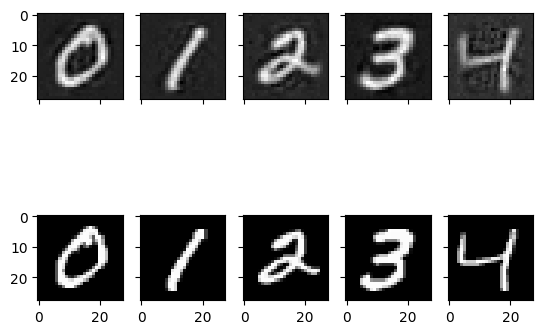

In [5]:
# h=32 linear
fig, axs = plt.subplots(2, 5)
axs[0, 0].imshow(y_pred.data[1,:].cpu().reshape(28,28), cmap="gray")
axs[1, 0].imshow(X_train_tensor[1,:].cpu().reshape(28,28), cmap="gray")

axs[0, 1].imshow(y_pred.data[3,:].cpu().reshape(28,28), cmap="gray")
axs[1, 1].imshow(X_train_tensor[3,:].cpu().reshape(28,28), cmap="gray")

axs[0, 2].imshow(y_pred.data[5,:].cpu().reshape(28,28), cmap="gray")
axs[1, 2].imshow(X_train_tensor[5,:].cpu().reshape(28,28), cmap="gray")

axs[0, 3].imshow(y_pred.data[7,:].cpu().reshape(28,28), cmap="gray")
axs[1, 3].imshow(X_train_tensor[7,:].cpu().reshape(28,28), cmap="gray")

axs[0, 4].imshow(y_pred.data[2,:].cpu().reshape(28,28), cmap="gray")
axs[1, 4].imshow(X_train_tensor[2,:].cpu().reshape(28,28), cmap="gray")


for ax in fig.get_axes():
    ax.label_outer()

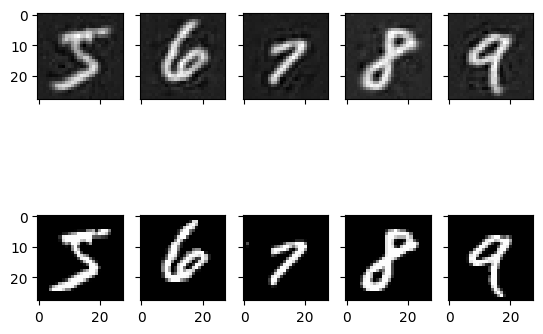

In [6]:
fig, axs = plt.subplots(2, 5)
axs[0, 0].imshow(y_pred.data[0,:].cpu().reshape(28,28), cmap="gray")
axs[1, 0].imshow(X_train_tensor[0,:].cpu().reshape(28,28), cmap="gray")

axs[0, 1].imshow(y_pred.data[13,:].cpu().reshape(28,28), cmap="gray")
axs[1, 1].imshow(X_train_tensor[13,:].cpu().reshape(28,28), cmap="gray")

axs[0, 2].imshow(y_pred.data[29,:].cpu().reshape(28,28), cmap="gray")
axs[1, 2].imshow(X_train_tensor[29,:].cpu().reshape(28,28), cmap="gray")

axs[0, 3].imshow(y_pred.data[31,:].cpu().reshape(28,28), cmap="gray")
axs[1, 3].imshow(X_train_tensor[31,:].cpu().reshape(28,28), cmap="gray")

axs[0, 4].imshow(y_pred.data[4,:].cpu().reshape(28,28), cmap="gray")
axs[1, 4].imshow(X_train_tensor[4,:].cpu().reshape(28,28), cmap="gray")

for ax in fig.get_axes():
    ax.label_outer()

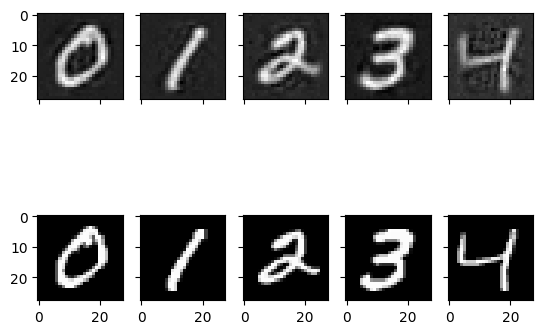

In [7]:
# h=64 linear
fig, axs = plt.subplots(2, 5)
axs[0, 0].imshow(y_pred.data[1,:].cpu().reshape(28,28), cmap="gray")
axs[1, 0].imshow(X_train_tensor[1,:].cpu().reshape(28,28), cmap="gray")

axs[0, 1].imshow(y_pred.data[3,:].cpu().reshape(28,28), cmap="gray")
axs[1, 1].imshow(X_train_tensor[3,:].cpu().reshape(28,28), cmap="gray")

axs[0, 2].imshow(y_pred.data[5,:].cpu().reshape(28,28), cmap="gray")
axs[1, 2].imshow(X_train_tensor[5,:].cpu().reshape(28,28), cmap="gray")

axs[0, 3].imshow(y_pred.data[7,:].cpu().reshape(28,28), cmap="gray")
axs[1, 3].imshow(X_train_tensor[7,:].cpu().reshape(28,28), cmap="gray")

axs[0, 4].imshow(y_pred.data[2,:].cpu().reshape(28,28), cmap="gray")
axs[1, 4].imshow(X_train_tensor[2,:].cpu().reshape(28,28), cmap="gray")


for ax in fig.get_axes():
    ax.label_outer()

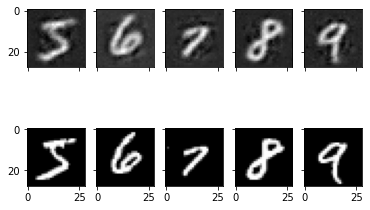

In [ ]:
fig, axs = plt.subplots(2, 5)
axs[0, 0].imshow(y_pred.data[0,:].cpu().reshape(28,28), cmap="gray")
axs[1, 0].imshow(X_train_tensor[0,:].cpu().reshape(28,28), cmap="gray")

axs[0, 1].imshow(y_pred.data[13,:].cpu().reshape(28,28), cmap="gray")
axs[1, 1].imshow(X_train_tensor[13,:].cpu().reshape(28,28), cmap="gray")

axs[0, 2].imshow(y_pred.data[29,:].cpu().reshape(28,28), cmap="gray")
axs[1, 2].imshow(X_train_tensor[29,:].cpu().reshape(28,28), cmap="gray")

axs[0, 3].imshow(y_pred.data[31,:].cpu().reshape(28,28), cmap="gray")
axs[1, 3].imshow(X_train_tensor[31,:].cpu().reshape(28,28), cmap="gray")

axs[0, 4].imshow(y_pred.data[4,:].cpu().reshape(28,28), cmap="gray")
axs[1, 4].imshow(X_train_tensor[4,:].cpu().reshape(28,28), cmap="gray")

for ax in fig.get_axes():
    ax.label_outer()

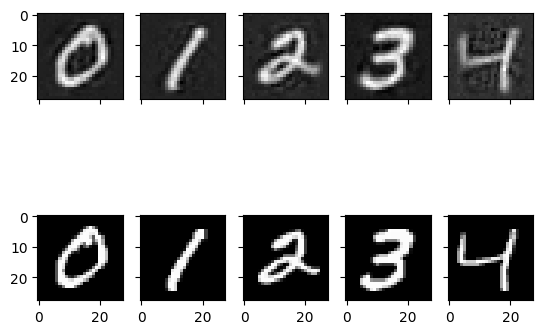

In [9]:
# h=128 linear
fig, axs = plt.subplots(2, 5)
axs[0, 0].imshow(y_pred.data[1,:].cpu().reshape(28,28), cmap="gray")
axs[1, 0].imshow(X_train_tensor[1,:].cpu().reshape(28,28), cmap="gray")

axs[0, 1].imshow(y_pred.data[3,:].cpu().reshape(28,28), cmap="gray")
axs[1, 1].imshow(X_train_tensor[3,:].cpu().reshape(28,28), cmap="gray")

axs[0, 2].imshow(y_pred.data[5,:].cpu().reshape(28,28), cmap="gray")
axs[1, 2].imshow(X_train_tensor[5,:].cpu().reshape(28,28), cmap="gray")

axs[0, 3].imshow(y_pred.data[7,:].cpu().reshape(28,28), cmap="gray")
axs[1, 3].imshow(X_train_tensor[7,:].cpu().reshape(28,28), cmap="gray")

axs[0, 4].imshow(y_pred.data[2,:].cpu().reshape(28,28), cmap="gray")
axs[1, 4].imshow(X_train_tensor[2,:].cpu().reshape(28,28), cmap="gray")


for ax in fig.get_axes():
    ax.label_outer()

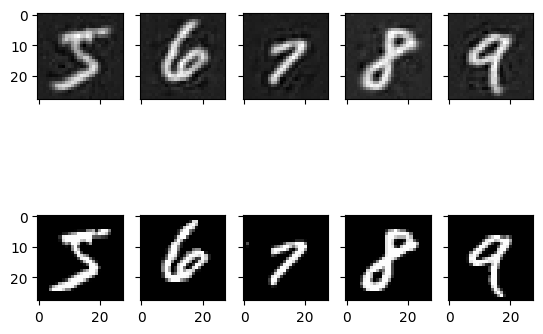

In [10]:
fig, axs = plt.subplots(2, 5)
axs[0, 0].imshow(y_pred.data[0,:].cpu().reshape(28,28), cmap="gray")
axs[1, 0].imshow(X_train_tensor[0,:].cpu().reshape(28,28), cmap="gray")

axs[0, 1].imshow(y_pred.data[13,:].cpu().reshape(28,28), cmap="gray")
axs[1, 1].imshow(X_train_tensor[13,:].cpu().reshape(28,28), cmap="gray")

axs[0, 2].imshow(y_pred.data[29,:].cpu().reshape(28,28), cmap="gray")
axs[1, 2].imshow(X_train_tensor[29,:].cpu().reshape(28,28), cmap="gray")

axs[0, 3].imshow(y_pred.data[31,:].cpu().reshape(28,28), cmap="gray")
axs[1, 3].imshow(X_train_tensor[31,:].cpu().reshape(28,28), cmap="gray")

axs[0, 4].imshow(y_pred.data[4,:].cpu().reshape(28,28), cmap="gray")
axs[1, 4].imshow(X_train_tensor[4,:].cpu().reshape(28,28), cmap="gray")

for ax in fig.get_axes():
    ax.label_outer()

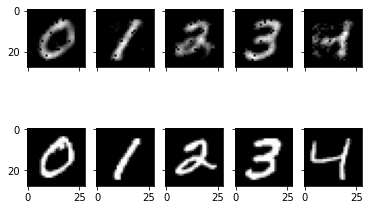

In [ ]:
# h=32 relu
fig, axs = plt.subplots(2, 5)
axs[0, 0].imshow(y_pred.data[1,:].cpu().reshape(28,28), cmap="gray")
axs[1, 0].imshow(X_train_tensor[1,:].cpu().reshape(28,28), cmap="gray")

axs[0, 1].imshow(y_pred.data[3,:].cpu().reshape(28,28), cmap="gray")
axs[1, 1].imshow(X_train_tensor[3,:].cpu().reshape(28,28), cmap="gray")

axs[0, 2].imshow(y_pred.data[5,:].cpu().reshape(28,28), cmap="gray")
axs[1, 2].imshow(X_train_tensor[5,:].cpu().reshape(28,28), cmap="gray")

axs[0, 3].imshow(y_pred.data[7,:].cpu().reshape(28,28), cmap="gray")
axs[1, 3].imshow(X_train_tensor[7,:].cpu().reshape(28,28), cmap="gray")

axs[0, 4].imshow(y_pred.data[2,:].cpu().reshape(28,28), cmap="gray")
axs[1, 4].imshow(X_train_tensor[2,:].cpu().reshape(28,28), cmap="gray")


for ax in fig.get_axes():
    ax.label_outer()

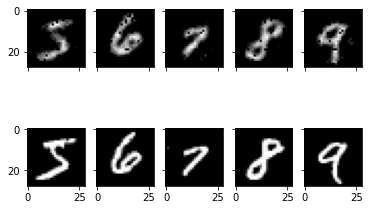

In [ ]:
fig, axs = plt.subplots(2, 5)
axs[0, 0].imshow(y_pred.data[0,:].cpu().reshape(28,28), cmap="gray")
axs[1, 0].imshow(X_train_tensor[0,:].cpu().reshape(28,28), cmap="gray")

axs[0, 1].imshow(y_pred.data[13,:].cpu().reshape(28,28), cmap="gray")
axs[1, 1].imshow(X_train_tensor[13,:].cpu().reshape(28,28), cmap="gray")

axs[0, 2].imshow(y_pred.data[29,:].cpu().reshape(28,28), cmap="gray")
axs[1, 2].imshow(X_train_tensor[29,:].cpu().reshape(28,28), cmap="gray")

axs[0, 3].imshow(y_pred.data[31,:].cpu().reshape(28,28), cmap="gray")
axs[1, 3].imshow(X_train_tensor[31,:].cpu().reshape(28,28), cmap="gray")

axs[0, 4].imshow(y_pred.data[4,:].cpu().reshape(28,28), cmap="gray")
axs[1, 4].imshow(X_train_tensor[4,:].cpu().reshape(28,28), cmap="gray")

for ax in fig.get_axes():
    ax.label_outer()

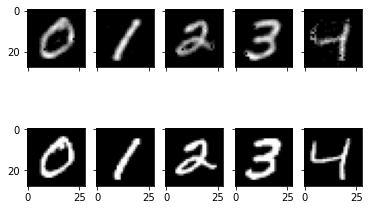

In [ ]:
# h=64 relu
fig, axs = plt.subplots(2, 5)
axs[0, 0].imshow(y_pred.data[1,:].cpu().reshape(28,28), cmap="gray")
axs[1, 0].imshow(X_train_tensor[1,:].cpu().reshape(28,28), cmap="gray")

axs[0, 1].imshow(y_pred.data[3,:].cpu().reshape(28,28), cmap="gray")
axs[1, 1].imshow(X_train_tensor[3,:].cpu().reshape(28,28), cmap="gray")

axs[0, 2].imshow(y_pred.data[5,:].cpu().reshape(28,28), cmap="gray")
axs[1, 2].imshow(X_train_tensor[5,:].cpu().reshape(28,28), cmap="gray")

axs[0, 3].imshow(y_pred.data[7,:].cpu().reshape(28,28), cmap="gray")
axs[1, 3].imshow(X_train_tensor[7,:].cpu().reshape(28,28), cmap="gray")

axs[0, 4].imshow(y_pred.data[2,:].cpu().reshape(28,28), cmap="gray")
axs[1, 4].imshow(X_train_tensor[2,:].cpu().reshape(28,28), cmap="gray")


for ax in fig.get_axes():
    ax.label_outer()

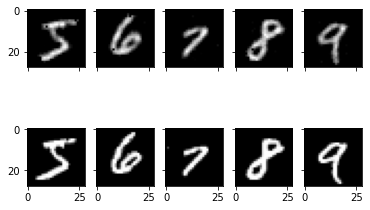

In [ ]:
fig, axs = plt.subplots(2, 5)
axs[0, 0].imshow(y_pred.data[0,:].cpu().reshape(28,28), cmap="gray")
axs[1, 0].imshow(X_train_tensor[0,:].cpu().reshape(28,28), cmap="gray")

axs[0, 1].imshow(y_pred.data[13,:].cpu().reshape(28,28), cmap="gray")
axs[1, 1].imshow(X_train_tensor[13,:].cpu().reshape(28,28), cmap="gray")

axs[0, 2].imshow(y_pred.data[29,:].cpu().reshape(28,28), cmap="gray")
axs[1, 2].imshow(X_train_tensor[29,:].cpu().reshape(28,28), cmap="gray")

axs[0, 3].imshow(y_pred.data[31,:].cpu().reshape(28,28), cmap="gray")
axs[1, 3].imshow(X_train_tensor[31,:].cpu().reshape(28,28), cmap="gray")

axs[0, 4].imshow(y_pred.data[4,:].cpu().reshape(28,28), cmap="gray")
axs[1, 4].imshow(X_train_tensor[4,:].cpu().reshape(28,28), cmap="gray")

for ax in fig.get_axes():
    ax.label_outer()

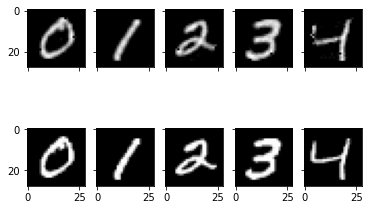

In [ ]:
# h=128 relu
fig, axs = plt.subplots(2, 5)
axs[0, 0].imshow(y_pred.data[1,:].cpu().reshape(28,28), cmap="gray")
axs[1, 0].imshow(X_train_tensor[1,:].cpu().reshape(28,28), cmap="gray")

axs[0, 1].imshow(y_pred.data[3,:].cpu().reshape(28,28), cmap="gray")
axs[1, 1].imshow(X_train_tensor[3,:].cpu().reshape(28,28), cmap="gray")

axs[0, 2].imshow(y_pred.data[5,:].cpu().reshape(28,28), cmap="gray")
axs[1, 2].imshow(X_train_tensor[5,:].cpu().reshape(28,28), cmap="gray")

axs[0, 3].imshow(y_pred.data[7,:].cpu().reshape(28,28), cmap="gray")
axs[1, 3].imshow(X_train_tensor[7,:].cpu().reshape(28,28), cmap="gray")

axs[0, 4].imshow(y_pred.data[2,:].cpu().reshape(28,28), cmap="gray")
axs[1, 4].imshow(X_train_tensor[2,:].cpu().reshape(28,28), cmap="gray")


for ax in fig.get_axes():
    ax.label_outer()

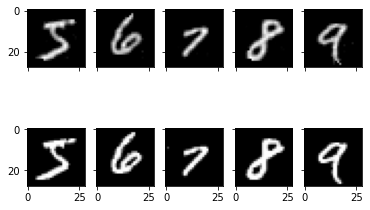

In [ ]:
fig, axs = plt.subplots(2, 5)
axs[0, 0].imshow(y_pred.data[0,:].cpu().reshape(28,28), cmap="gray")
axs[1, 0].imshow(X_train_tensor[0,:].cpu().reshape(28,28), cmap="gray")

axs[0, 1].imshow(y_pred.data[13,:].cpu().reshape(28,28), cmap="gray")
axs[1, 1].imshow(X_train_tensor[13,:].cpu().reshape(28,28), cmap="gray")

axs[0, 2].imshow(y_pred.data[29,:].cpu().reshape(28,28), cmap="gray")
axs[1, 2].imshow(X_train_tensor[29,:].cpu().reshape(28,28), cmap="gray")

axs[0, 3].imshow(y_pred.data[31,:].cpu().reshape(28,28), cmap="gray")
axs[1, 3].imshow(X_train_tensor[31,:].cpu().reshape(28,28), cmap="gray")

axs[0, 4].imshow(y_pred.data[4,:].cpu().reshape(28,28), cmap="gray")
axs[1, 4].imshow(X_train_tensor[4,:].cpu().reshape(28,28), cmap="gray")

for ax in fig.get_axes():
    ax.label_outer()